In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import joblib


In [2]:
data = load_breast_cancer()

X = data.data
y = data.target

print("X shape:", X.shape)
print("y distribution:", np.bincount(y))


X shape: (569, 30)
y distribution: [212 357]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [4]:
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=1000))
    ]),

    "Decision Tree": DecisionTreeClassifier(random_state=42),

    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ),

    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVC(kernel="rbf"))
    ])
}


In [5]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })


In [6]:
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.982456   0.986111  0.986111  0.986111
1        Decision Tree  0.912281   0.955882  0.902778  0.928571
2        Random Forest  0.956140   0.958904  0.972222  0.965517
3                  SVM  0.982456   0.986111  0.986111  0.986111


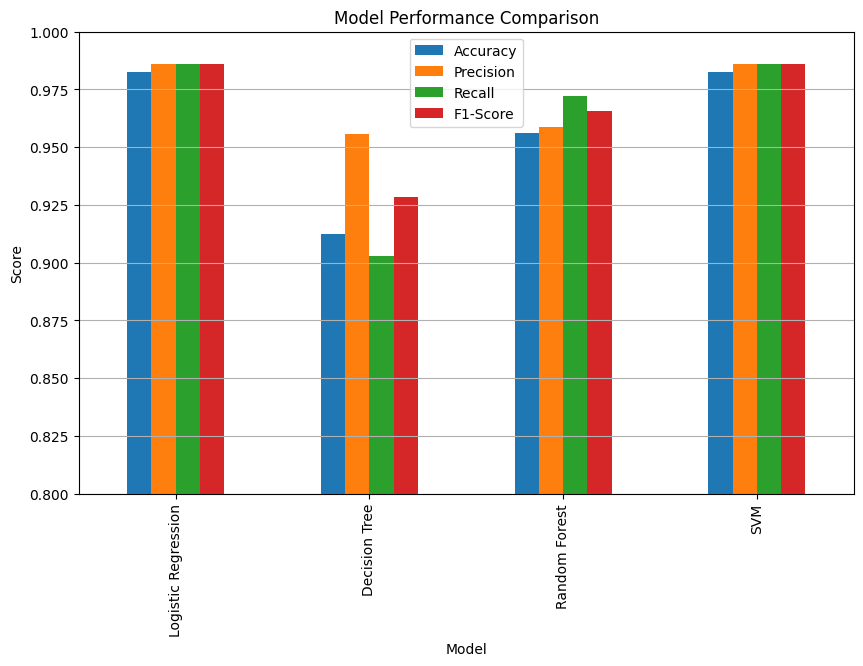

In [7]:
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score"]].plot(
    kind="bar",
    figsize=(10,6)
)

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.grid(axis="y")
plt.show()


In [8]:
train_test_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_test_scores.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc
    })

train_test_df = pd.DataFrame(train_test_scores)
print(train_test_df)


                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.989011       0.982456
1        Decision Tree        1.000000       0.912281
2        Random Forest        1.000000       0.956140
3                  SVM        0.982418       0.982456


In [9]:
best_model_name = results_df.sort_values("F1-Score", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

best_model.fit(X_train, y_train)

joblib.dump(best_model, "best_model.pkl")

print("Best Model:", best_model_name)
print("Best model saved as best_model.pkl")


Best Model: Logistic Regression
Best model saved as best_model.pkl
